# MNIST

## Download Mnist Data

In [7]:
import urllib.request
import os

folder = "mnist"
if os.path.exists(folder) is False:
    os.makedirs(folder, exist_ok=True)

base_url = "http://jrkwon.com/data/ece5831/mnist/"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

for filename in files:
    print(f"Downloading {filename}...")
    filepath = os.path.join(folder, filename)

    # check if file already exists
    if os.path.exists(filepath):
        print(f"{filename} already exists. Skipping download.")
        continue

    # to resolve 406 Not Acceptable error
    opener = urllib.request.build_opener()
    opener.addheaders = [('Accept', '')]
    urllib.request.install_opener(opener)

    urllib.request.urlretrieve(base_url + filename, filepath)

print("Download complete.")

Download complete.


### Create necessary functions

In [8]:
import urllib.request
import os

folder = "mnist"
base_url = "http://jrkwon.com/data/ece5831/mnist/"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

# Function to download MNIST data
def _download_mnist():

    if os.path.exists(folder) is False:
        os.makedirs(folder, exist_ok=True)

    for filename in files:
        print(f"Downloading {filename}...")
        filepath = os.path.join(folder, filename)

        # check if file already exists
        if os.path.exists(filepath):
            print(f"{filename} already exists. Skipping download.")
            continue

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(base_url + filename, filepath)

    print("Download complete.")

In [10]:
# Test _download_mnist function

_download_mnist()

train-images-idx3-ubyte.gz already exists. Skipping download.
train-labels-idx1-ubyte.gz already exists. Skipping download.
t10k-images-idx3-ubyte.gz already exists. Skipping download.
t10k-labels-idx1-ubyte.gz already exists. Skipping download.
Download complete.


### Convert Mnist Data to Pickle

In [12]:
import gzip

filepath = os.path.join(folder, files[0])

f = gzip.open(filepath, 'rb')
f.read(16)
buf = f.read(28 * 28 * 60000)   


In [17]:
import numpy as np

In [21]:
img = np.array(buf[0:28*28])
# Convert the ubyte array to a numpy array of uint8 and reshape to 28x28
img_np = np.frombuffer(img, dtype=np.uint8).reshape(28, 28)

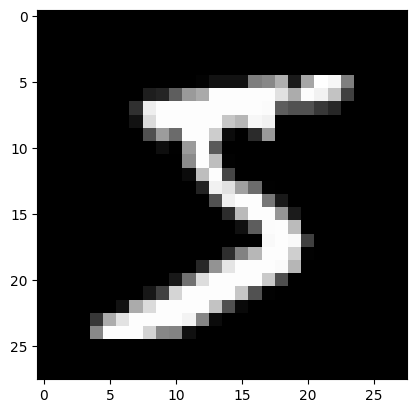

In [23]:
import matplotlib.pyplot as plt

plt.imshow(img_np, cmap='gray')

In [24]:
# read label file
filepath = os.path.join(folder, files[1])
f = gzip.open(filepath, 'rb')
f.read(8)
labels_buf = f.read(60000)
labels = np.frombuffer(labels_buf, dtype=np.uint8)
print(labels[0])

5


### Functions to load images and labels

In [27]:
import gzip
import numpy as np
import matplotlib.pyplot as plt 


In [26]:
def _load_images(file_path):

    with gzip.open(file_path, 'rb') as f:
        f.read(16)  # Skip the header
        buf = f.read()  # Read the rest of the file
        images = np.frombuffer(buf, dtype=np.uint8)
        images = images.reshape(-1, 28, 28)  # Reshape to (num_images, 28, 28)
    return images

(60000, 28, 28)


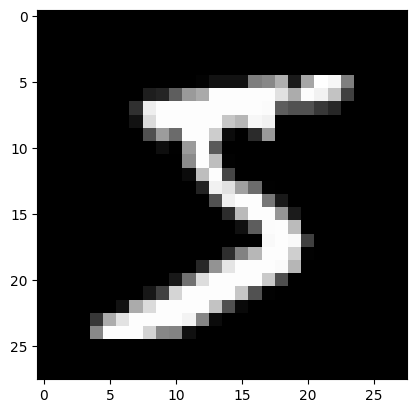

In [33]:
# Test the function
images = _load_images(os.path.join(folder, files[0]))
print(images.shape)  # Should print (60000, 28, 28)
plt.imshow(images[0], cmap='gray')

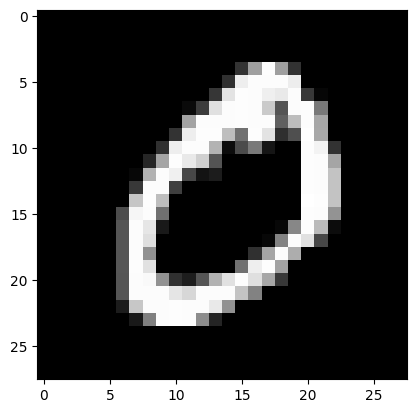

In [32]:
plt.imshow(images[1], cmap='gray')

In [34]:
def _load_labels(file_path):

    with gzip.open(file_path, 'rb') as f:
        f.read(8)  # Skip the header
        buf = f.read()  # Read the rest of the file
        labels = np.frombuffer(buf, dtype=np.uint8)
    return labels

In [35]:
# Test the function
labels = _load_labels(os.path.join(folder, files[1]))
print(labels.shape)  # Should print (60000,)
print(labels[0])  # Should print the label of the first image 
print(labels[1])  # Should print the label of the second image 


(60000,)
5
0


## Let's make things more beautiful

In [47]:
import gzip
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [39]:
# dictionary to map a file type to its file name
key_to_file = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}
mnist_data_dir = "mnist"    # location for .gz files
mnist_pickle_name = "mnist.pkl"

In [41]:
# Function to download MNIST data
def _download(filename):

    if os.path.exists(folder) is False:
        os.makedirs(folder, exist_ok=True)

    print(f"Downloading {filename}...")
    filepath = os.path.join(folder, filename)

    # check if file already exists
    if os.path.exists(filepath):
        print(f"{filename} already exists. Skipping download.")
        return

    # to resolve 406 Not Acceptable error
    opener = urllib.request.build_opener()
    opener.addheaders = [('Accept', '')]
    urllib.request.install_opener(opener)

    urllib.request.urlretrieve(base_url + filename, filepath)

    print("Download complete.")

In [42]:
def _download_mnist():

    for key in key_to_file:
        _download(key_to_file[key])

In [44]:
# Test the function
_download_mnist()

train-images-idx3-ubyte.gz already exists. Skipping download.
train-labels-idx1-ubyte.gz already exists. Skipping download.
t10k-images-idx3-ubyte.gz already exists. Skipping download.
t10k-labels-idx1-ubyte.gz already exists. Skipping download.


In [45]:
# Function to load MNIST images
def _load_images(file_path):

    with gzip.open(file_path, 'rb') as f:
        f.read(16)  # Skip the header
        buf = f.read()  # Read the rest of the file
        images = np.frombuffer(buf, dtype=np.uint8)
        images = images.reshape(-1, 28, 28)  # Reshape to (num_images, 28, 28)
    return images

In [46]:
# Function to load MNIST labels
def _load_labels(file_path):

    with gzip.open(file_path, 'rb') as f:
        f.read(8)  # Skip the header
        buf = f.read()  # Read the rest of the file
        labels = np.frombuffer(buf, dtype=np.uint8)
    return labels

In [48]:
def _make_dataset():
    if os.path.exists(mnist_pickle_name):
        print(f"{mnist_pickle_name} already exists. Loading dataset from pickle file.")
        with open(mnist_pickle_name, 'rb') as f:
            mnist_data = pickle.load(f)
        return mnist_data

    # Load training and test data
    train_images = _load_images(os.path.join(mnist_data_dir, key_to_file["train_images"]))
    train_labels = _load_labels(os.path.join(mnist_data_dir, key_to_file["train_labels"]))
    test_images = _load_images(os.path.join(mnist_data_dir, key_to_file["test_images"]))
    test_labels = _load_labels(os.path.join(mnist_data_dir, key_to_file["test_labels"]))

    # Package the data into a dictionary
    mnist_data = {
        "train_images": train_images,
        "train_labels": train_labels,
        "test_images": test_images,
        "test_labels": test_labels
    }

    # Save the dataset as a pickle file
    with open(mnist_pickle_name, 'wb') as f:
        pickle.dump(mnist_data, f)

    print(f"MNIST dataset created and saved to {mnist_pickle_name}")
    return mnist_data

In [50]:
dataset = _make_dataset()

mnist.pkl already exists. Loading dataset from pickle file.


5


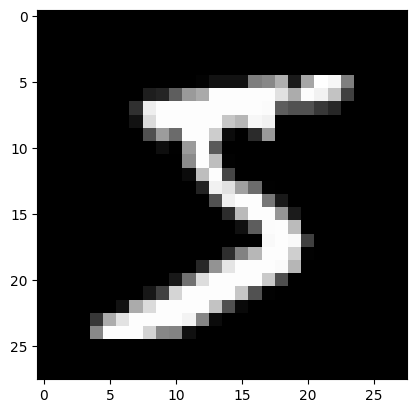

In [54]:
img = dataset['train_images'][0]
plt.imshow(img, cmap='gray')
print(dataset['train_labels'][0])
plt.show()

## Let's Make MnistData Class

In [ ]:
import gzip
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import urllib.request

class MnistData:
    
    # dictionary to map a file type to its file name
    key_to_file = {
        "train_images": "train-images-idx3-ubyte.gz",
        "train_labels": "train-labels-idx1-ubyte.gz",
        "test_images": "t10k-images-idx3-ubyte.gz",
        "test_labels": "t10k-labels-idx1-ubyte.gz"
    }
    mnist_data_dir = "mnist"    # location for .gz files
    mnist_pickle_name = "mnist.pkl"

    def __init__(self):
        self._download_all()
        self.dataset = self._make_dataset()

    # Function to download MNIST data
    def _download(self, filename):

        if os.path.exists(self.mnist_data_dir) is False:
            os.makedirs(self.mnist_data_dir, exist_ok=True)

        print(f"Downloading {filename}...")
        filepath = os.path.join(self.mnist_data_dir, filename)

        # check if file already exists
        if os.path.exists(filepath):
            print(f"{filename} already exists. Skipping download.")
            return

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(base_url + filename, filepath)

        print("Download complete.")

    def _download_all(self):

        for key in self.key_to_file:
            self._download(self.key_to_file[key])

    # Function to load MNIST images
    def _load_images(self, file_path):

        with gzip.open(file_path, 'rb') as f:
            f.read(16)  # Skip the header
            buf = f.read()  # Read the rest of the file
            images = np.frombuffer(buf, dtype=np.uint8)
            images = images.reshape(-1, 28, 28)  # Reshape to (num_images, 28, 28)
        return images

    # Function to load MNIST labels
    def _load_labels(self, file_path):

        with gzip.open(file_path, 'rb') as f:
            f.read(8)  # Skip the header
            buf = f.read()  # Read the rest of the file
            labels = np.frombuffer(buf, dtype=np.uint8)
        return labels
    
    def _make_dataset(self):
        if os.path.exists(self.mnist_pickle_name):
            print(f"{self.mnist_pickle_name} already exists. Loading dataset from pickle file.")
            with open(self.mnist_pickle_name, 'rb') as f:
                mnist_data = pickle.load(f)
            return mnist_data

        # Load training and test data
        train_images = self._load_images(os.path.join(self.mnist_data_dir, self.key_to_file["train_images"]))
        train_labels = self._load_labels(os.path.join(self.mnist_data_dir, self.key_to_file["train_labels"]))
        test_images = self._load_images(os.path.join(self.mnist_data_dir, self.key_to_file["test_images"]))
        test_labels = self._load_labels(os.path.join(self.mnist_data_dir, self.key_to_file["test_labels"]))

        # Package the data into a dictionary
        mnist_data = {
            "train_images": train_images,
            "train_labels": train_labels,
            "test_images": test_images,
            "test_labels": test_labels
        }

        # Save the dataset as a pickle file
        with open(self.mnist_pickle_name, 'wb') as f:
            pickle.dump(mnist_data, f)

        print(f"MNIST dataset created and saved to {self.mnist_pickle_name}")
        return mnist_data
    
    def get_dataset(self):
        return (self.dataset['train_images'], self.dataset['train_labels']), \
                (self.dataset['test_images'], self.dataset['test_labels'])

In [67]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.get_dataset() 

train-images-idx3-ubyte.gz already exists. Skipping download.
train-labels-idx1-ubyte.gz already exists. Skipping download.
t10k-images-idx3-ubyte.gz already exists. Skipping download.
t10k-labels-idx1-ubyte.gz already exists. Skipping download.
mnist.pkl already exists. Loading dataset from pickle file.


3


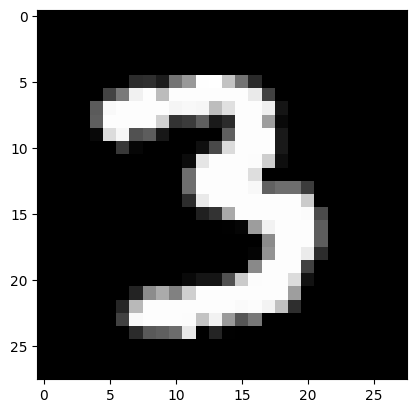

In [68]:
img = test_images[500]
label = test_labels[500]
plt.imshow(img, cmap='gray')
print(label)

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)